In [1]:
import math
import numpy as np
import networkx as nx

def make_art_graph(
    n_spiral: int = 70,
    n_clusters: int = 4,
    cluster_size: int = 12,
    seed: int = 42
) -> nx.Graph:
    """
    Build an 'artistic' graph with:
      - A spiral main structure (like a galaxy arm)
      - Several dense satellite clusters around it
    Node attributes:
      - 'group': which part the node belongs to (spiral / cluster id)
      - 'value': continuous value for color mapping
      - 'size': for node size mapping
    Edge attributes:
      - 'weight': used for edge color / width
    """
    rng = np.random.default_rng(seed)
    G = nx.Graph()

    # ------------------------------
    # 1. Main spiral "galaxy arm"
    # ------------------------------
    spiral_nodes = []
    for i in range(n_spiral):
        node_id = f"S{i}"
        # value in [0, 1] for color gradient
        value = i / max(1, n_spiral - 1)
        size = 10 + 20 * value  # bigger as it goes outwards

        G.add_node(
            node_id,
            group="spiral",
            value=float(value),
            size=float(size),
        )
        spiral_nodes.append(node_id)

    # Connect spiral with consecutive edges and some long chords
    for i in range(n_spiral - 1):
        u = spiral_nodes[i]
        v = spiral_nodes[i + 1]
        # smooth weight change
        weight = 1 + 4 * (i / max(1, n_spiral - 1))
        G.add_edge(u, v, weight=float(weight))

    # Add a few long-range edges across the spiral for visual interest
    for _ in range(n_spiral // 2):
        i = rng.integers(0, n_spiral - 10)
        j = i + rng.integers(5, 15)
        if j < n_spiral:
            u = spiral_nodes[i]
            v = spiral_nodes[j]
            weight = 3 + 7 * rng.random()  # thicker and brighter
            if not G.has_edge(u, v):
                G.add_edge(u, v, weight=float(weight))

    # ------------------------------
    # 2. Satellite clusters
    # ------------------------------
    cluster_nodes_all = []
    for c in range(n_clusters):
        cluster_nodes = []
        for j in range(cluster_size):
            node_id = f"C{c}_{j}"
            # let clusters have slightly different value ranges
            base = 0.2 + 0.6 * (c / max(1, n_clusters - 1))
            jitter = 0.1 * rng.random()
            value = min(1.0, max(0.0, base + jitter - 0.05))
            size = 15 + 10 * rng.random()

            G.add_node(
                node_id,
                group=f"cluster_{c}",
                value=float(value),
                size=float(size),
            )
            cluster_nodes.append(node_id)
            cluster_nodes_all.append(node_id)

        # make each cluster internally dense but not complete
        # (about 60–70% density)
        for a in range(cluster_size):
            for b in range(a + 1, cluster_size):
                if rng.random() < 0.65:
                    weight = 2 + 5 * rng.random()
                    G.add_edge(cluster_nodes[a], cluster_nodes[b], weight=float(weight))

    # ------------------------------
    # 3. Connect clusters to the spiral
    # ------------------------------
    for c in range(n_clusters):
        # pick a random spiral node as "anchor"
        anchor = spiral_nodes[rng.integers(0, n_spiral)]
        # pick 2–4 nodes from this cluster
        start = c * cluster_size
        cluster_nodes = cluster_nodes_all[start : start + cluster_size]
        k = rng.integers(2, 5)
        chosen = rng.choice(cluster_nodes, size=k, replace=False)

        for node_id in chosen:
            weight = 4 + 6 * rng.random()
            G.add_edge(anchor, node_id, weight=float(weight))

    return G


if __name__ == "__main__":
    G = make_art_graph()
    print(G)
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())


Graph with 118 nodes and 290 edges
Number of nodes: 118
Number of edges: 290


In [9]:
import matplotlib.pyplot as plt
from complex_NX import NX_style

# 1. build graph
G = make_art_graph()

# 2. draw with your fancy helper
#    根据你自己的函数签名稍微改下参数名字就行
NX_style(
    G,
    mode="2d",  # "3d" (Plotly) or "2d" (PyVis)
    # ---- node visuals ----
    node_size='Popularity',
    node_color='Efficiency',
    node_style = "turbo",
    edge_color_attr = "weight",
    edge_style = "rainbow",
    weak_weights=[],
    weak_max_per_node=[],
    simple=False,
    output_html=None,
    height = 1000,
    width = 1000,
    physics=True,
    edge_shape = "arc",  # "straight" or "arc"
)

<class 'pyvis.network.Network'> |N|=118 |E|=290

20 nodes, 100 edges


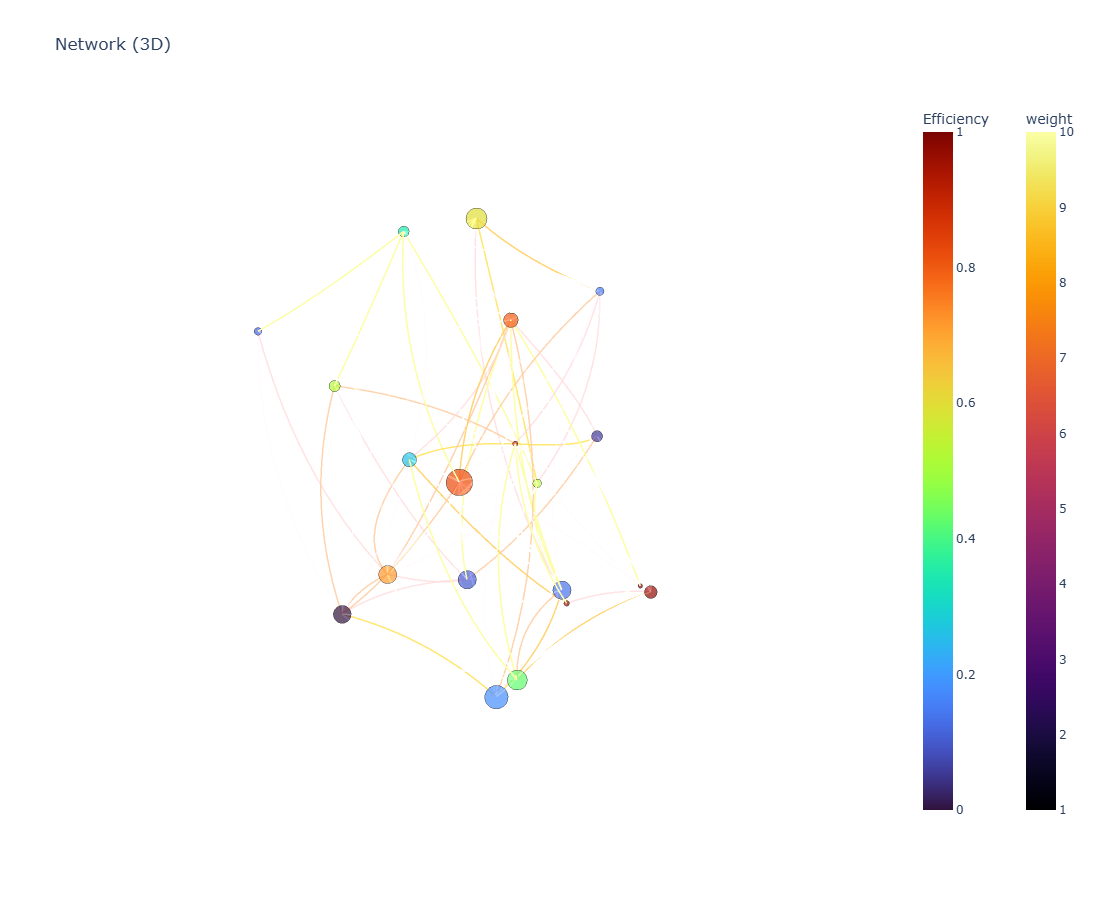

In [3]:
%matplotlib inline

import numpy as np
import networkx as nx
from complex_NX import NX_style   # 或者 from complex_NX import NX_3d_style as NX_style

# 固定随机种子，结果可复现
rng = np.random.RandomState(42)

# -------- 1. 构建图：20 个节点 --------
G = nx.Graph()

for i in range(20):
    G.add_node(
        i,
        Popularity=float(rng.uniform(0, 100)),   # 节点大小用
        Efficiency=float(rng.uniform(0, 100)),   # 节点颜色用
    )

# -------- 2. 加边：目标 ~100 条 --------
nodes = list(G.nodes())
possible_edges = [(u, v) for i, u in enumerate(nodes) for v in nodes[i+1:]]

# 从所有可能边里随机抽 100 条
n_edges = 100
chosen_idx = rng.choice(len(possible_edges), size=n_edges, replace=False)

for idx in chosen_idx:
    u, v = possible_edges[idx]
    w = int(rng.randint(1, 11))  # 权重 1~10
    G.add_edge(
        u,
        v,
        weight=w,
        similarity=float(rng.uniform(0, 1)),  # 再加一个随便的边属性，方便以后玩
    )

print(G.number_of_nodes(), "nodes,", G.number_of_edges(), "edges")

# -------- 3. 用 NX_style 画 3D 图 --------
NX_style(
    G,
    mode="3d",
    edge_shape='arc',
    node_size="Popularity",
    node_color="Efficiency",
    node_style="turbo",
    edge_color_attr="weight",   # 用 weight 上色
    edge_style="inferno",
    weak_weights=[],        # 把权重 1、2 当 weak edge
    weak_max_per_node=[],   # 每个点最多保留 2 条该权重的弱边
    simple=False,
    hide_isolates=False,
    hover_attrs="all",
    height=900,
    width=900,
    output_html=None,           # 如果想存成 html 就写文件名，比如 "test_3d.html"
    show=True,
)


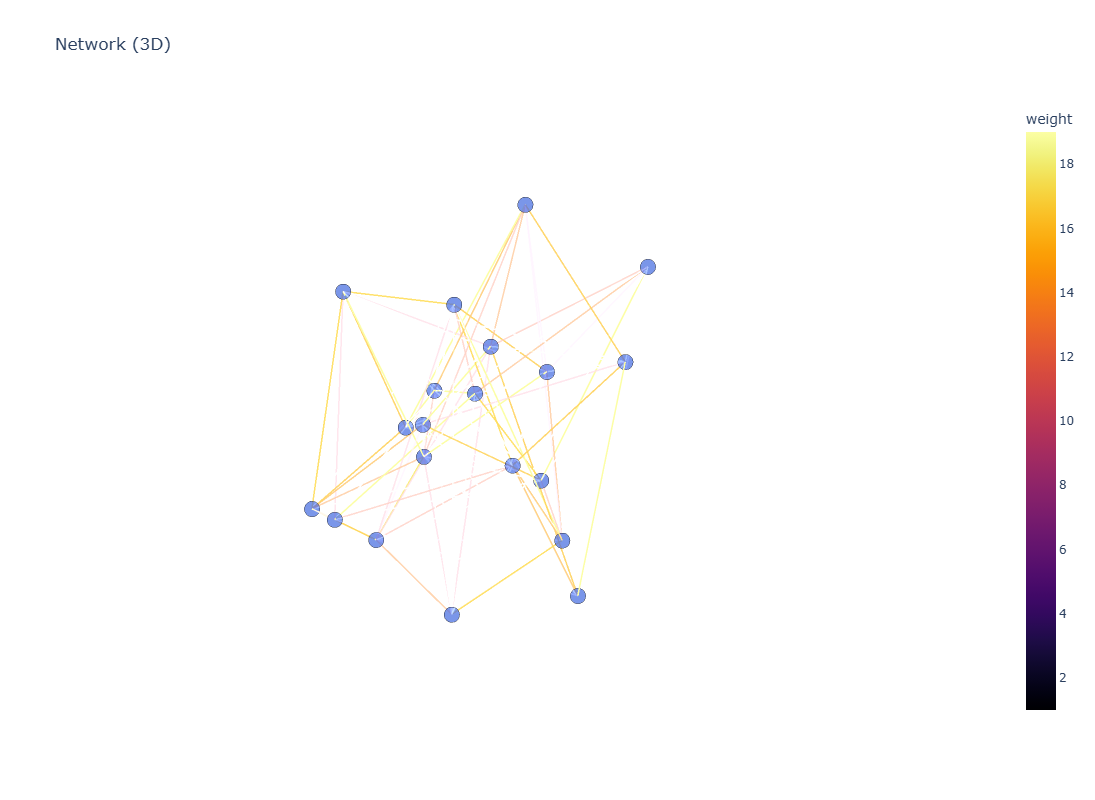

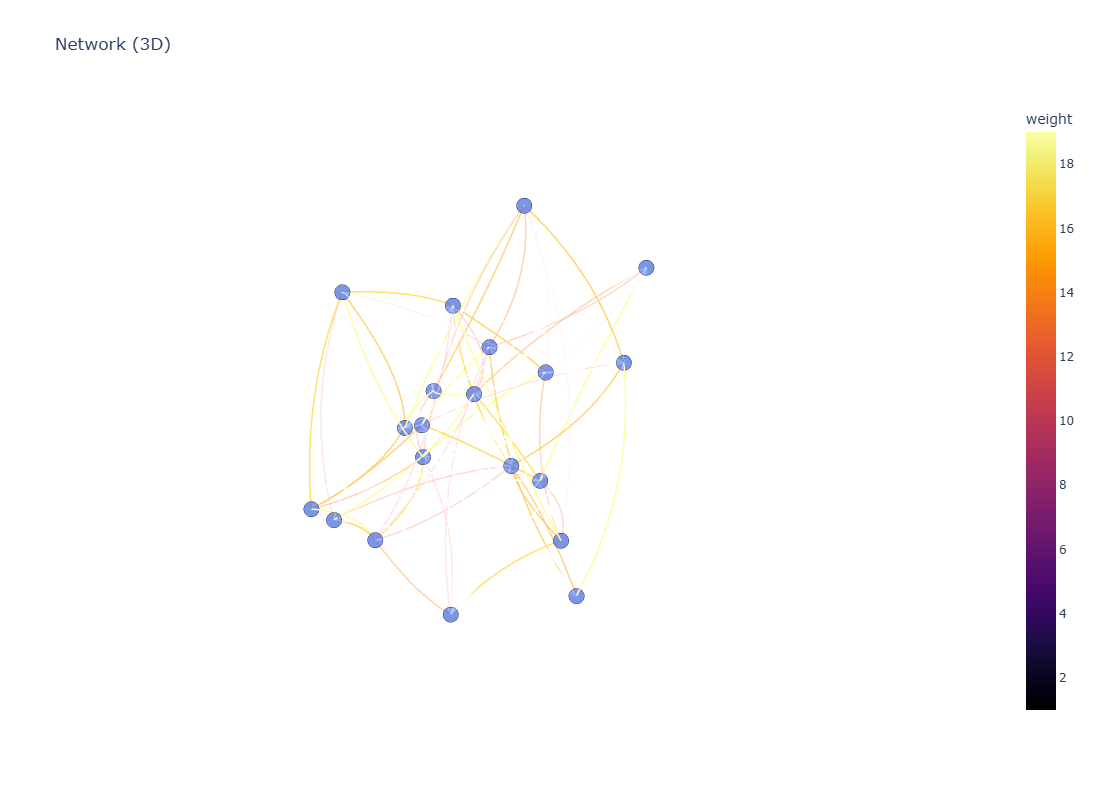

In [2]:
import networkx as nx
from complex_NX import NX_style

G = nx.gnm_random_graph(20, 100, seed=0)
for u, v in G.edges():
    G[u][v]["weight"] = np.random.randint(1, 20)

# 直线版
NX_style(G, mode="3d", node_size=None, node_color=None,
         edge_color_attr="weight", edge_shape="straight",
         height=800, width=800)

# 弧线版
NX_style(G, mode="3d", node_size=None, node_color=None,
         edge_color_attr="weight", edge_shape="arc",
         height=800, width=800)
